In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

# naive and gaussian model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

# for accuracy
from sklearn import metrics

# print precision and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import load_digits

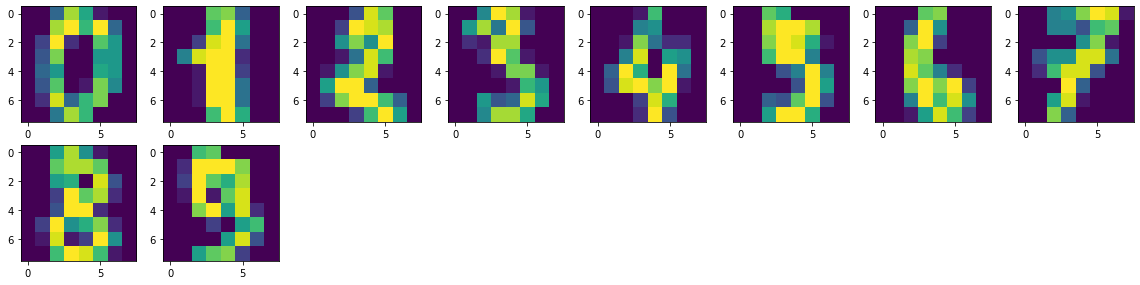

In [ ]:
main_data = load_digits()

plt.figure(figsize = (20, 20))

for i in range(10):
    plt.subplot(8, 8, i + 1)
    plt.imshow(main_data.images[i])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(main_data.data, main_data.target, test_size = 0.20, random_state = 34) 

In [10]:
gnb = GaussianNB()

# train model
gnb.fit(X_train, Y_train)

# training completed
Y_predicted = gnb.predict(X_test)

print(f"Accuracy :- {metrics.accuracy_score(Y_test, Y_predicted)}")

Accuracy :- 0.8333333333333334


In [ ]:
main_data.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

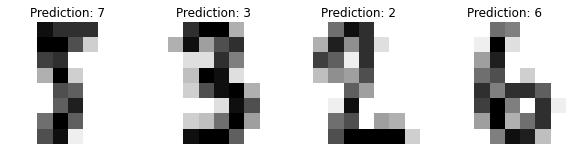

In [11]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, Y_predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [12]:
print(f"Classification report for classifier {gnb}:\n"
      f"{metrics.classification_report(Y_test, Y_predicted)}\n")

Classification report for classifier GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.88      0.76      0.81        37
           2       0.93      0.84      0.89        32
           3       0.91      0.83      0.87        47
           4       0.91      0.77      0.83        39
           5       0.89      0.87      0.88        38
           6       0.86      0.94      0.90        34
           7       0.56      0.92      0.70        25
           8       0.72      0.86      0.78        42
           9       0.81      0.61      0.69        28

    accuracy                           0.83       360
   macro avg       0.84      0.83      0.83       360
weighted avg       0.85      0.83      0.84       360




Confusion matrix:
[[35  0  0  0  2  0  0  1  0  0]
 [ 0 28  0  0  0  0  2  1  5  1]
 [ 0  0 27  0  1  0  0  0  4  0]
 [ 0  1  2 39  0  1  0  0  2  2]
 [ 0  0  0  0 30  0  2  7  0  0]
 [ 0  0  0  3  0 33  1  1  0  0]
 [ 0  1  0  0  0  1 32  0  0  0]
 [ 0  0  0  0  0  1  0 23  0  1]
 [ 0  1  0  0  0  1  0  4 36  0]
 [ 2  1  0  1  0  0  0  4  3 17]]


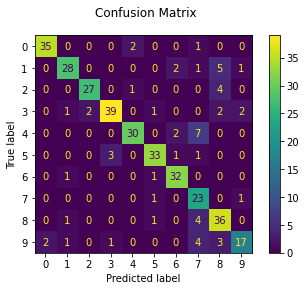

In [13]:
disp = metrics.plot_confusion_matrix(gnb, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()